In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy

import warnings
warnings.filterwarnings('ignore')

## Autocorrelation recap

Periodicities in a signal may be recognised as positive peaks in the **autocorrelation coefficients** $r_L$ for a range of time lags $L$

$$ r_L = \frac{1}{n-L} \sum_{t=1}^{n-L} (X_t-\bar{X}) (X_{t+L} - \bar{X}) / \frac{1}{n} \sum_{t=1}^n (X_t-\bar{X})^2$$



In [83]:
def my_autocorrelation(x):
    n=len(x)
    r_L=[]
    for L in range(n):
        c_h=1/(n-L)*sum( [(x[t]-np.mean(x))*(x[t+L]-np.mean(x)) for t in range(n-L)] )
        #alternative estimations may normalise differently, e.g. with 1/n
        
        c_0=1/n* sum([(x[t]-np.mean(x))**2 for t in range(n)])
        r_L.append(c_h/c_0)
        
    return r_L


<IPython.core.display.Javascript object>


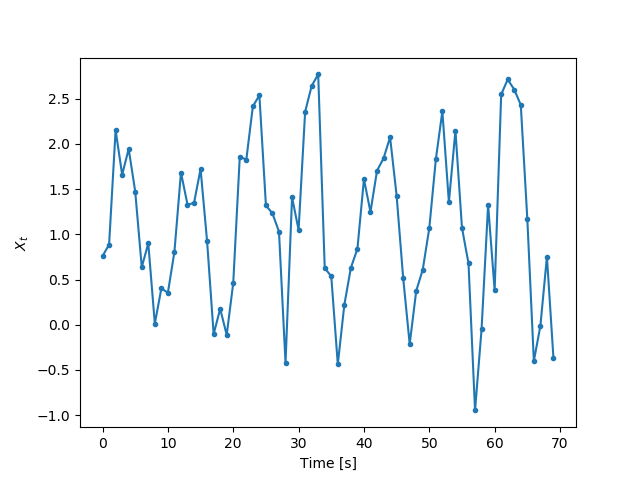

<IPython.core.display.Javascript object>


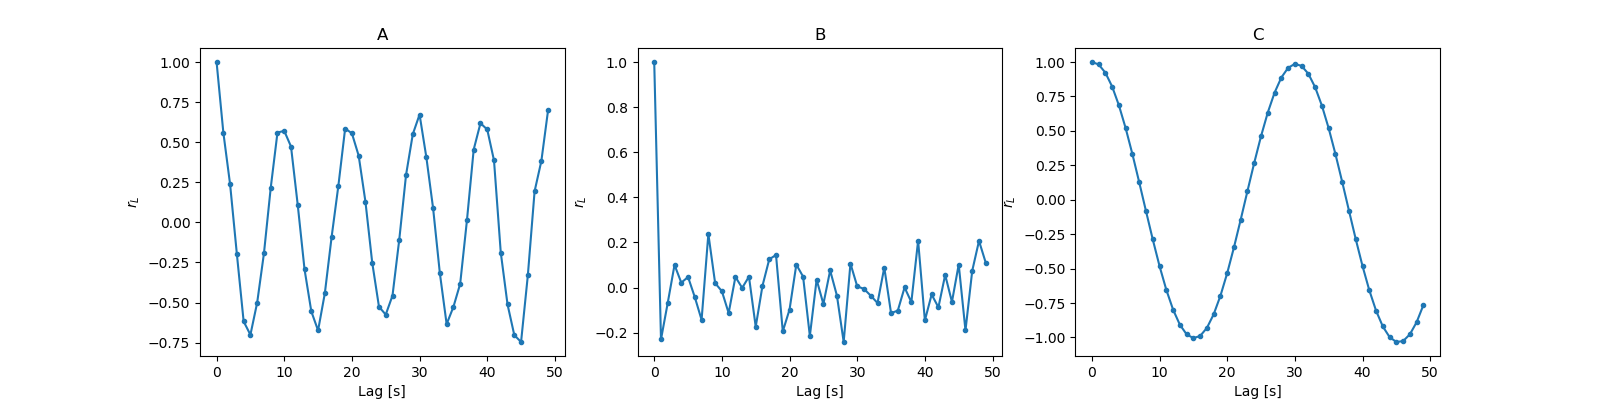

In [116]:
t = np.arange(0, 70, 1.0)

y = np.sin(2*np.pi *1./10. *t)   +2.*np.random.random(len(t))
y2 = np.random.random(len(t))
y3 = np.sin(2*np.pi *1./30. *t)
y4 = +2.*np.random.random(len(t)) + t/50.

plt.plot(t,y, '.-')
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('$X_t$')
plt.gcf().savefig('../autocorrelation_y.png',dpi=300)

plt.figure(figsize=(16,4))
plt.gcf().add_subplot(131)
plt.plot(my_autocorrelation(y)[:50], '.-')
plt.gca().set_xlabel('Lag [s]')
plt.gca().set_ylabel('$r_L$')
plt.gca().set_title('A')

plt.gcf().add_subplot(132)
plt.plot(my_autocorrelation(y2)[:50], '.-' )
plt.gca().set_xlabel('Lag [s]')
plt.gca().set_ylabel('$r_L$')
plt.gca().set_title('B')

plt.gcf().add_subplot(133)
plt.plot(my_autocorrelation(y3)[:50], '.-' )
plt.gca().set_xlabel('Lag [s]')
plt.gca().set_ylabel('$r_L$')
plt.gca().set_title('C')

plt.gcf().savefig('../autocorrelation_rl.png',dpi=300,bbox_inches='tight')

In [85]:
def my_discrete_fourier_transform(x):
    x = np.asarray(x)
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    M = np.exp(-2j * np.pi * k * n / N)
    
    return np.dot(M, x)

In [112]:
def plot_fourier_transform(t, x, windowing=False):
    dt=np.diff(t)[0] #assuming equal spacing
    f_s=1./dt
    
    N = len(x)
    k = np.arange(N)

    T = N/f_s #total time period sampled
    
    frq = k/T
    
    X = my_discrete_fourier_transform(x)

    fig = plt.figure()
    plt.plot(frq, np.abs(X), '.-')
    
    if windowing:
        win = np.kaiser(len(t), 5)
        X_win = my_discrete_fourier_transform(x * win)
        ax1.plot(t, x* win)
        ax2.plot(frq, 2.0/N * np.abs(X_win))
    
    return [plt.gca(),plt.gcf()]

<IPython.core.display.Javascript object>


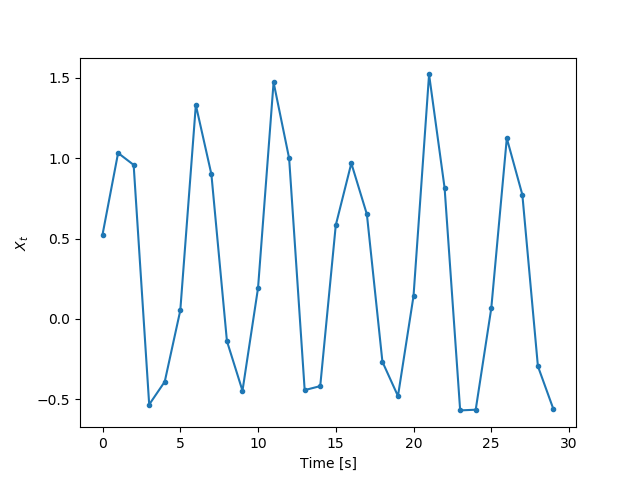

<IPython.core.display.Javascript object>


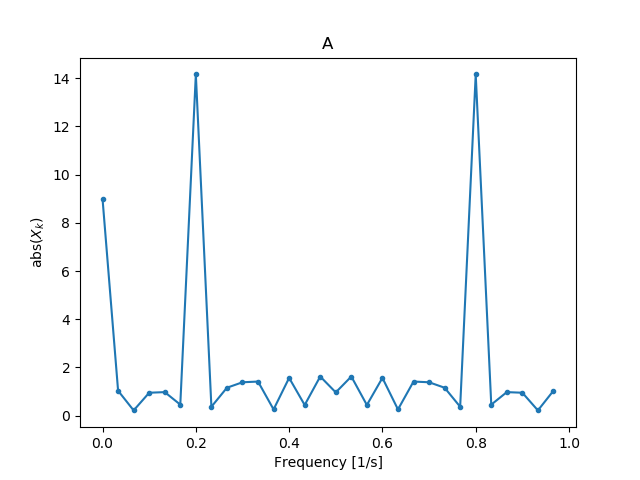

<IPython.core.display.Javascript object>


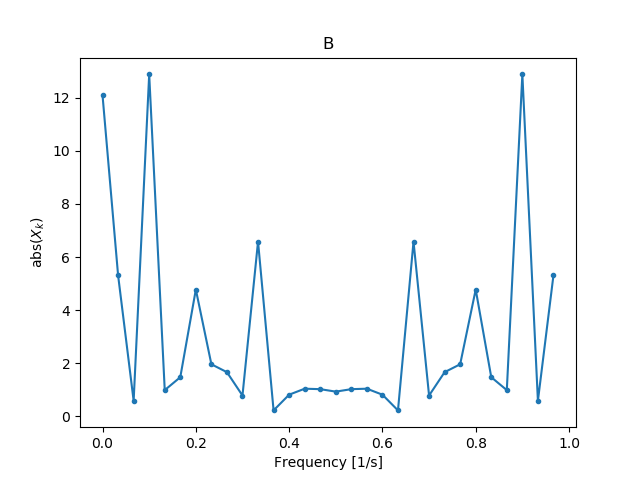

<IPython.core.display.Javascript object>


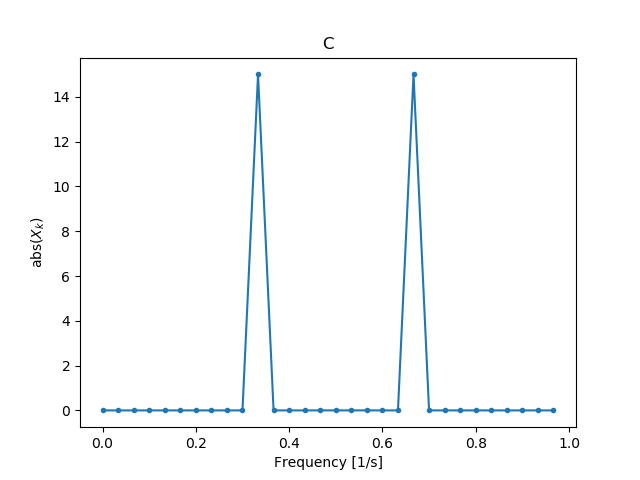

In [117]:
t = np.arange(0, 30, 1.0)

y1 = np.sin(2*np.pi *1./5 *t)   +0.6*np.random.random(len(t))
y2 = np.random.random(1)*np.sin(2*np.pi *1./10. *t)+np.random.random(1)*np.sin(2*np.pi *1./5. *t)+np.random.random(1)*np.sin(2*np.pi *1./3. *t) +np.random.random(1)*np.sin(2*np.pi *1./30. *t)+0.8*np.random.random(len(t))
y3 = np.sin(2*np.pi *1./3. *t)

plt.figure()
plt.plot(t,y1, '.-')
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('$X_t$')
plt.gcf().savefig('../fourier_figures/Fourier_ts.png',dpi=300)

#plot power spectrum
plot_fourier_transform(t, y1, windowing=False)
plt.gca().set_xlabel('Frequency [1/s]')
plt.gca().set_ylabel('abs($X_k$)')
plt.gca().set_title('A')
plt.gcf().savefig('../fourier_figures/Fourier_A.png',dpi=300,bbox_inches='tight')

plot_fourier_transform(t, y2, windowing=False)
plt.gca().set_xlabel('Frequency [1/s]')
plt.gca().set_ylabel('abs($X_k$)')
plt.gca().set_title('B')
plt.gcf().savefig('../fourier_figures/Fourier_B.png',dpi=300,bbox_inches='tight')

plot_fourier_transform(t, y3, windowing=False)
plt.gca().set_xlabel('Frequency [1/s]')
plt.gca().set_ylabel('abs($X_k$)')
plt.gca().set_title('C')
plt.gcf().savefig('../fourier_figures/Fourier_C.png',dpi=300,bbox_inches='tight')


In [118]:
table48=[4.17,
 5.61,
 3.88,
 1.55,
 2.30,
 5.58,
 5.58,
 5.14,
 4.52,
 1.53,
 4.24 ,
 1.18 ,
 3.17 ,
 4.72 ,
 2.17 ,
 2.17 ,
 3.94 ,
 0.95 ,
 1.48 ,
 5.68 ,
4.25,
3.66,
 2.12,
  1.24,
   3.64,
    8.44,
 5.20,
 2.33,
  2.18,
   3.43]

In [123]:
mu=np.mean(table48)

In [124]:
ss=np.std(table48, ddof=1)

In [138]:
for P in [2,3,4,5,1e6]:
    print( (P-mu)/ss )

-0.8658781845588025
-0.30178816204492503
0.26230186046895243
0.82639188298283
564088.0284556479


In [126]:
1-0.81

0.18999999999999995

In [134]:
30*(0.80-0.60)

6.000000000000002

In [135]:
30*0.2

6.0

In [141]:
(6-5.7)**2/5.7

0.01578947368421051

In [142]:
(6-6.6)**2/6.6

0.05454545454545449

In [143]:
(5-6.)**2/6.

0.16666666666666666

In [146]:
(7-6.)**2/6. *2 +0.016*2 +0.054

0.4193333333333333

In [161]:
x1=44.1
x2=48.0
s1=11.3
s2=8.2
n1=1000
n2=100

(x1-x2)/(np.sqrt(s1**2/n1+s2**2/n2))


-4.360087308110914

In [162]:
s1**2/s2**2

1.8990184414039266